<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Daily_Growth_Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
deaths_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv",\
                         index_col='date')
deaths_raw = deaths_raw.fillna(method='pad')
deaths_raw = deaths_raw.fillna(0)

In [0]:
# Tipping point deaths
TP_deaths = 10

In [0]:
list_countries = ["China", "France", "Italy", "Spain", "United Kingdom"]

In [0]:
deaths = {}
for country in list_countries:
  deaths[country] = deaths_raw[country][deaths_raw[country] > TP_deaths]

In [6]:
deaths["Italy"].tail(3)

date
2020-03-27     8165
2020-03-28     9136
2020-03-29    10023
Name: Italy, dtype: int64

In [0]:
growth_rate_deaths = {}
for country in list_countries:
  aux = deaths[country]
  growth_rate_deaths[country] = [t/s for s, t in zip(aux, aux[1:]) if s is not 0]

In [0]:
# Window size deaths
WS_deaths = 7

In [0]:
rolling_deaths_mean = pd.Series()
for country in list_countries:
  grd = pd.Series(growth_rate_deaths[country])
  rolling_grd = grd.rolling(window=WS_deaths)
  rolling_deaths_mean[country] = rolling_grd.mean()

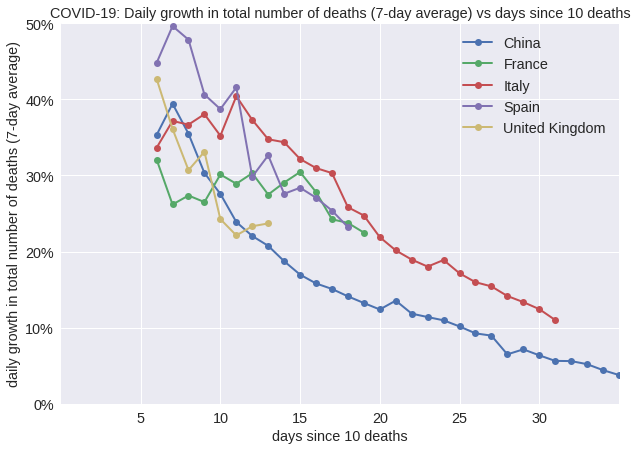

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  ax.plot(rolling_deaths_mean[country], label=country, linewidth=2, marker='o')

ax.set_xticks(np.arange(5,len(rolling_deaths_mean["Italy"]),5))
ax.set_xticklabels(np.arange(5,len(rolling_deaths_mean["Italy"]),5), fontsize='x-large')
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'], fontsize='x-large')
plt.title(f"COVID-19: Daily growth in total number of deaths ({WS_deaths}-day average) vs days since {TP_deaths} deaths", fontsize='x-large')
plt.xlabel(f"days since {TP_deaths} deaths", fontsize='x-large')
plt.ylabel(f"daily growth in total number of deaths ({WS_deaths}-day average)", fontsize='x-large')
plt.legend(fontsize='x-large')
plt.ylim(1.0,1.5)
plt.xlim(0,35)
plt.show()